## CVEN 6833 Homework 1

- **Theodore Barnhart**
- **September 3, 2015**

## Question 1 - January

In [1]:
# load data
jan = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_01.dat',na.strings = '-999.999'),ncol=4,byrow=T) #lat, lon, elev, P
jul = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',na.strings = '-999.999'),ncol=4,byrow=T) #lat, lon, elev, P
pts = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_dem.dat',na.strings = '-999.999'),ncol=3,byrow=T) # lat, lon, elev

In [2]:
# model combinations, could be done with leaps

#1 p ~ lat + lon + elev (TTT)
#2 p ~ lat + lon (TTF)
#3 p ~ lat + elev (TFT)
#4 p ~ lon + elev (FTT)
#5 p ~ lat (TFF)
#6 p ~ lon (FTF)
#7 p ~ elev (FFT)

mods = matrix(c(T,T,T,T,T,F,T,F,T,F,T,T,T,F,F,F,T,F,F,F,T),7,3, byrow = T) # set up matrix for models
N = dim(mods)[1] # get number of models

In [3]:
y = jan[,4] # pull out P
X = jan[,1:3] # pull out independand vars
obfx = 1:N # create a container for AIC values

In [4]:
for(i in 1:N){ # loop through each model
    tmp=lm(y ~ X[,mods[i,]]) # fit each model
    obfx[i] = AIC(tmp)
    }

In [5]:
best_mod = match(0,obfx-min(obfx)) # find the lowest value 
print('The Best Model is: ')
print(best_mod)

[1] "The Best Model is: "
[1] 1


In [6]:
## Fit the best model again
jan_mod = lm(y ~ X[,mods[best_mod,]])

### ii - ANOVA and model diagnostic plots

In [7]:
anova(jan_mod)

Analysis of Variance Table

Response: y
                       Df Sum Sq Mean Sq F value    Pr(>F)    
X[, mods[best_mod, ]]   3 246197   82066  139.71 < 2.2e-16 ***
Residuals             445 261390     587                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [8]:
library(ggplot2)
require(graphics)
library(reshape2)
library(grid)
source("http://peterhaschke.com/Code/multiplot.R")

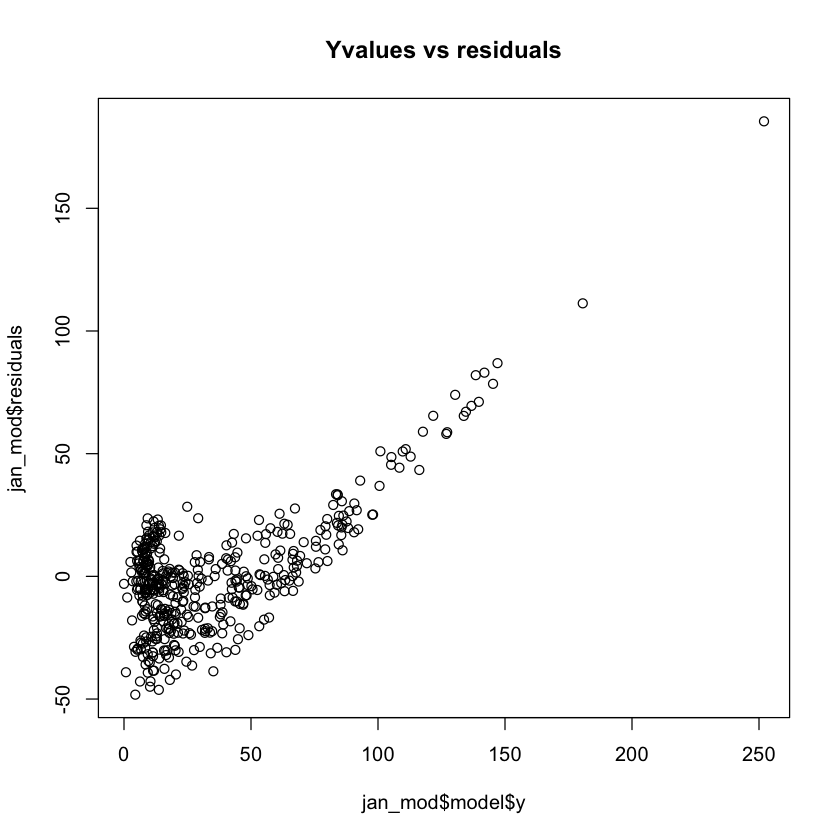

In [9]:
plot(jan_mod$model$y,jan_mod$residuals,main="Yvalues vs residuals")

Warning message:
: ‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’

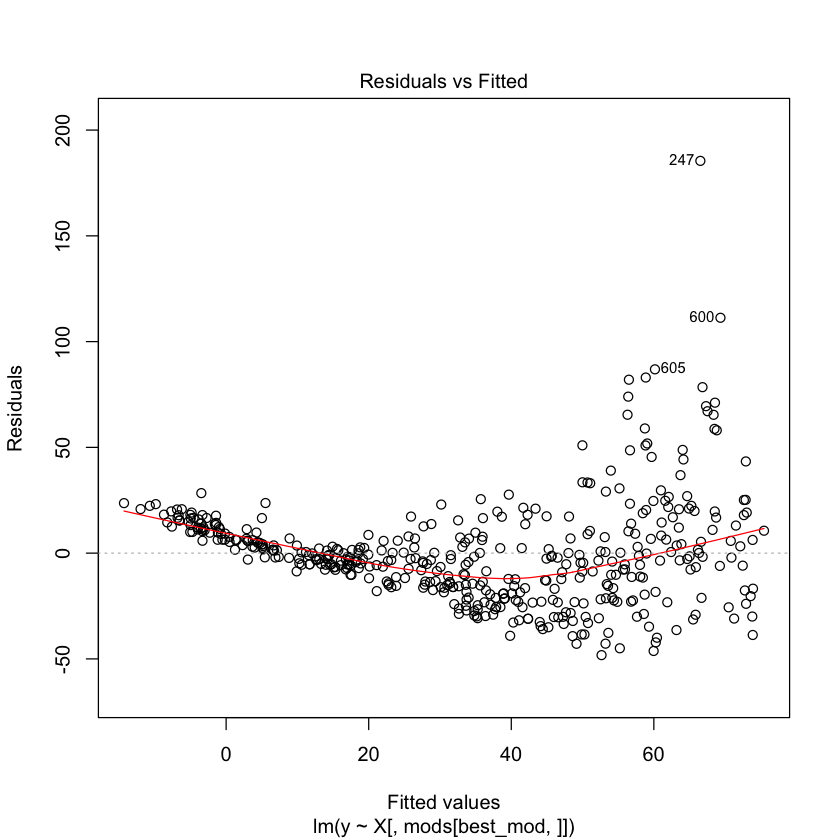

Warning message:
: ‘mode(antialias)’ differs between new and previous
	 ==> NOT changing ‘antialias’

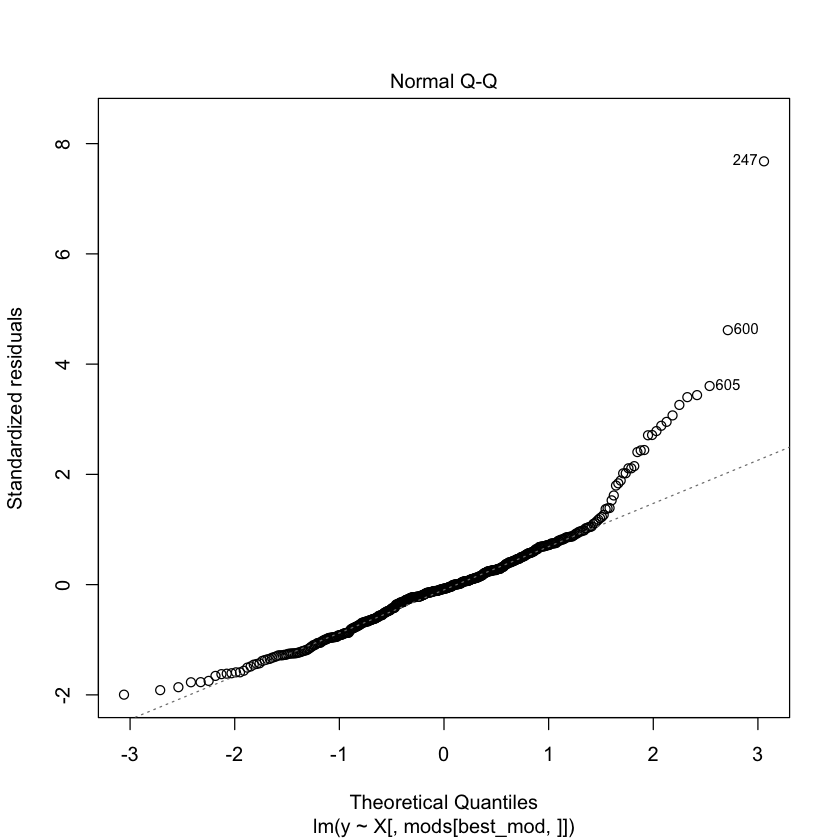

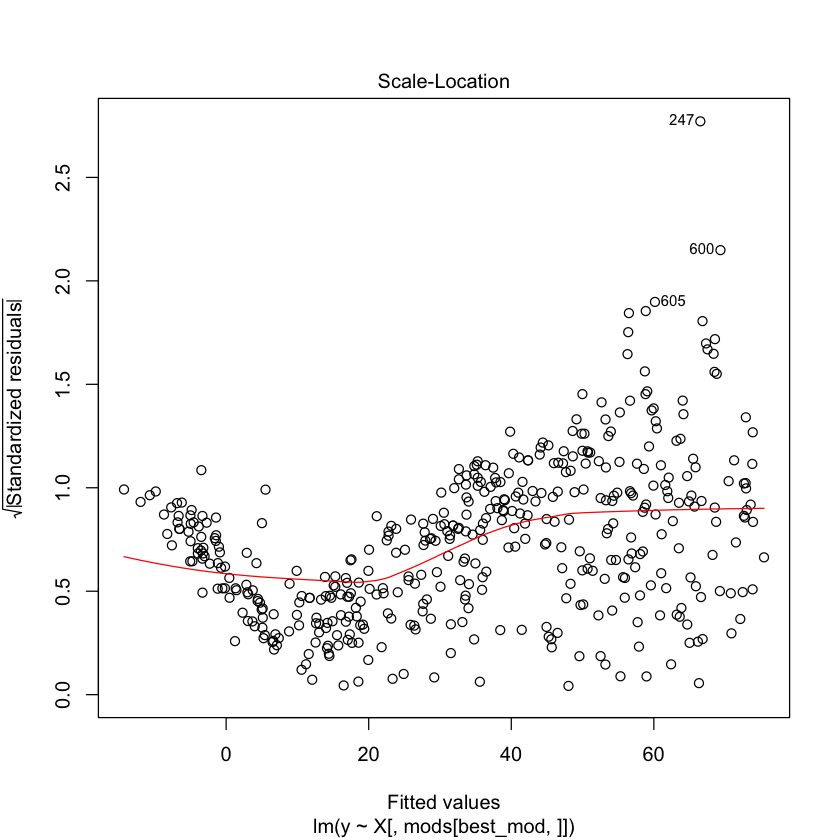

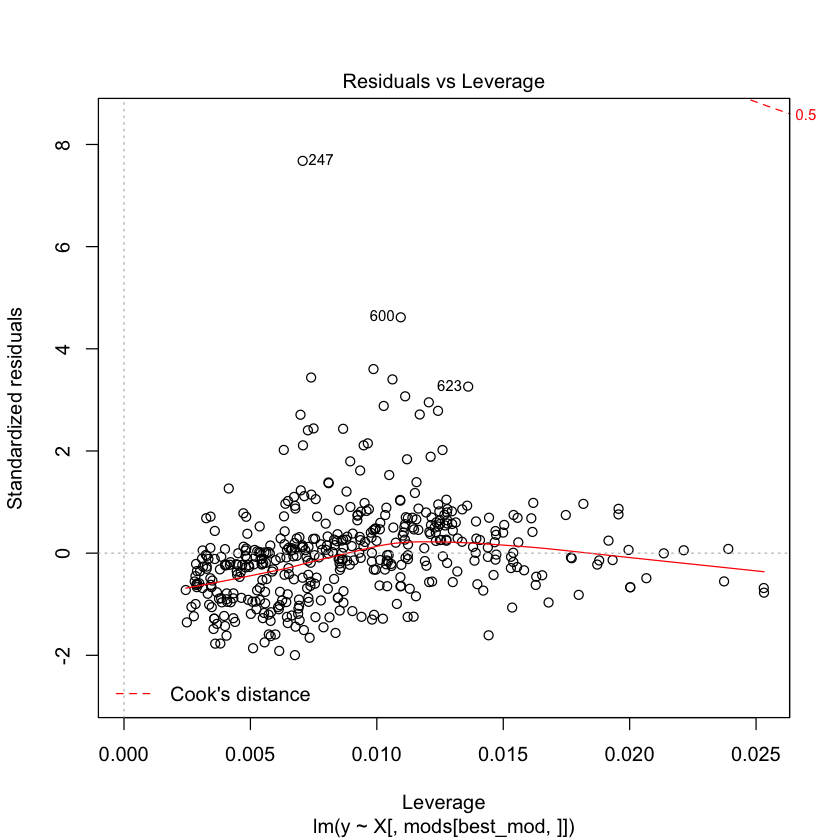

In [10]:
plot(jan_mod) # plot some more model diagnostics

In [11]:
resid = residuals(jan_mod)

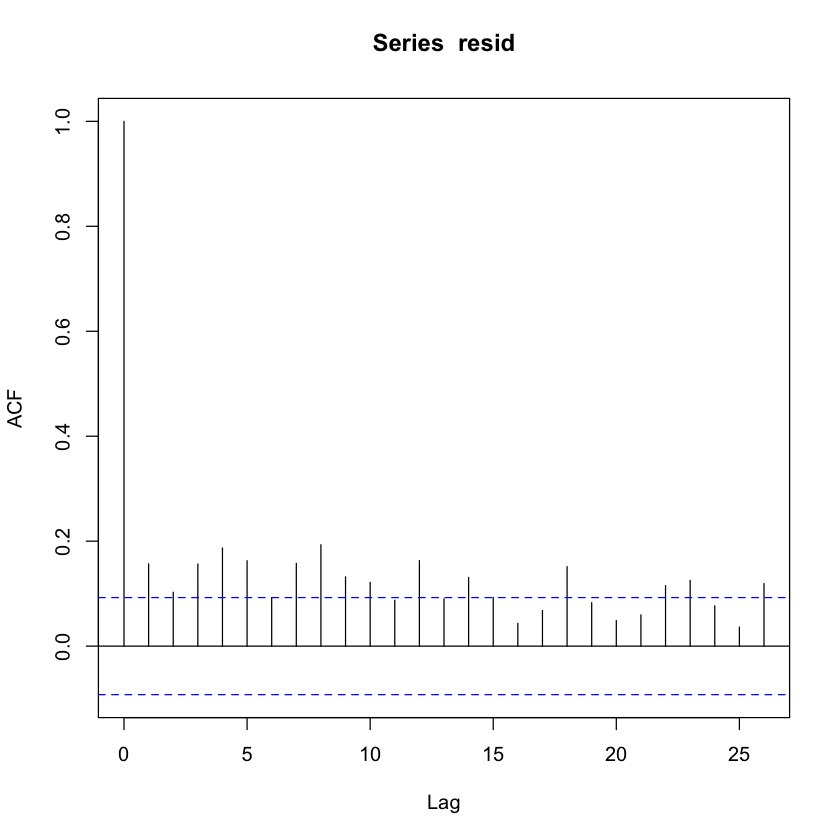

In [12]:
acf(resid)

### iii - Leave one out Cross Validation

refit the model using a data frame

In [13]:
# make a data frame of the data so that it works with predict()
jan = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_01.dat',na.strings = '-999.999'),ncol=4,byrow=T) #lat, lon, elev, P
X = data.frame(jan)
colnames(X) = c("lat","lon","elev","P")

In [14]:
n = length(y) # get the sample size
c1 = c(1:n) # create a subsetting variable
pred = c(1:n) # create a container for the predicted values
for (i in 1:n){
mod = lm(P ~ lat + lon + elev,X , subset=(c1!=i)) # fit a model leaving 1 point out
pred[i] = predict(mod,newdata = X[i,]) # predict the removed point using the model 
}

In [15]:
r2cv <- function(pred, obs){
    na_obs = is.na(obs) # find obs values that are nan
    na_pred = is.na(pred) # find pred values that are nan
    
    # create common data sets
    obs = obs[na_obs != T & na_pred != T]
    pred = pred[na_obs != T & na_pred != T]
    
    tss = sum((obs - mean(obs))^2)
    ess = sum((obs - pred)^2)
    r2 = 1 - (ess/tss)
return(r2)
}

In [16]:
r2cv(X[["P"]],pred)

[1] -0.07981547

This suggests that the model is very bad for the data when cross validated.

### iv - CV 10%

In [17]:
RMSEcv <- function(pred,obs){
    na_obs = is.na(obs) # find obs values that are nan
    na_pred = is.na(pred) # find pred values that are nan
    
    # create common data sets
    obs = obs[na_obs != T & na_pred != T]
    pred = pred[na_obs != T & na_pred != T]
    
    n = length(obs)
    rmse = (1/n)*sum((obs-pred)^2)
    return(rmse)
}

In [ ]:
N = 10000 # number of folds
RMSE = 1:N # RMSE container
R2 = 1:N # r2 container
nn = round(n*0.1) # set the number of points to leave out
for (i in 1:N){
    samp = sample(1:n, nn, replace=F) # generate the subset to be left out
    mod = lm(P ~ lat + lon + elev,X , subset=(c1!= samp)); # fit a model leaving 10% of the points out
    pred = predict(mod,X[samp,])
    obs = X[samp,"P"]
    R2[i] = r2cv(pred,obs)
    RMSE[i] = RMSEcv(pred,obs)
}

Warning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object length is not a multiple of shorter object lengthWarning message:
In c1 != samp: longer object leng

In [ ]:
boxplot(R2, main = "R^2 of January CV10% 10000 folds")

In [ ]:
boxplot(RMSE, main = "RMSE of January CV10% 10000 folds")

### v - map precipitation to DEM and map model error

In [ ]:
X = X[complete.cases(X),] # remove NAN values

In [ ]:
pts = data.frame(pts)
colnames(pts) = c("lat","lon","elev")
mod = lm(P ~ lat + lon + elev,X)
Phat = predict(mod,pts)
pts["Phat"] = Phat
intercept = 90.14136
coef1 = 1.01401
coef2 = 0.75526
coef3 = 0.00196

pts['err'] = intercept + coef1*pts$lat + coef2*pts$lon + coef3*pts$elev

In [ ]:
X["Phat"] = mod$fitted.values
X["resid"] = mod$residuals

In [ ]:
p1 = ggplot(X,aes(x=lon,y=lat,colour=Phat))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
p2 = ggplot(X,aes(x=lon,y=lat,colour=resid))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
multiplot(p1,p2, cols=1)

In [ ]:
# predicted model and model error (needs actual error)
p1 = ggplot(pts,aes(x=lon,y=lat,colour=Phat))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
p2 = ggplot(pts,aes(x=lon,y=lat,colour=err))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
multiplot(p1,p2, cols=1)

**Figure** January linear model extrapolated to the DEM grid (upper) and the model errors (lower).

## Question 1 - July
### i - model selection

In [ ]:
mods = matrix(c(T,T,T,T,T,F,T,F,T,F,T,T,T,F,F,F,T,F,F,F,T),7,3, byrow = T) # set up matrix for models
N = dim(mods)[1] # get number of models

y = jul[,4] # pull out P
X = jul[,1:3] # pull out independand vars
obfx = 1:N # create a container for AIC values

for(i in 1:N){ # loop through each model
    tmp=lm(y ~ X[,mods[i,]]) # fit each model
    obfx[i] = AIC(tmp)
    }

best_mod = match(0,obfx-min(obfx)) # find the lowest value 
print('The Best Model is: ')
print(best_mod)

### ii - ANOVA and diagnostic plots

In [ ]:
## Fit the best model again
jul_mod = lm(y ~ X[,mods[best_mod,]])

anova(jul_mod)

plot(jul_mod$model$y,jul_mod$residuals,main="Yvalues vs residuals")

plot(jul_mod) # plot some more model diagnostics

resid = residuals(jul_mod)

acf(resid)

### iii - Cross Validation

In [ ]:
# make a data frame of the data so that it works with predict()
july = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',na.strings = '-999.999'),ncol=4,byrow=T) #lat, lon, elev, P
X = data.frame(july)
colnames(X) = c("lat","lon","elev","P")

n = length(y) # get the sample size
c1 = c(1:n) # create a subsetting variable
pred = c(1:n) # create a container for the predicted values
for (i in 1:n){
mod = lm(P ~ lat + lon + elev,X , subset=(c1!=i)) # fit a model leaving 1 point out
pred[i] = predict(mod,newdata = X[i,]) # predict the removed point using the model 
}

r2cv(pred,X$P)

### iv - Leave 10% CV

In [ ]:
N = 10000 # number of folds
RMSE = 1:N # RMSE container
R2 = 1:N # r2 container
nn = round(n*0.1) # set the number of points to leave out
for (i in 1:N){
    samp = sample(1:n, nn, replace=F) # generate the subset to be left out
    mod = lm(P ~ lat + lon + elev,X , subset=(c1!= samp)); # fit a model leaving 10% of the points out
    pred = predict(mod,X[samp,])
    obs = X[samp,"P"]
    R2[i] = r2cv(pred,obs)
    RMSE[i] = RMSEcv(pred,obs)
}

In [ ]:
boxplot(R2, main = "R^2 of July CV10% 10000 folds")

boxplot(RMSE, main = "RMSE of July CV10% 10000 folds")

### v - plot model extimates and error

In [ ]:
pts = data.frame(pts)
colnames(pts) = c("lat","lon","elev")
mod = lm(P ~ lat + lon + elev,X)
Phat = predict(mod,pts)
err = predict(mod,pts,se.fit=True)
pts["Phat"] = Phat

In [234]:
summary(mod)


Call:
lm(formula = P ~ lat + lon + elev, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.050  -9.299  -1.715   8.221  81.350 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.024e+03  5.675e+01  18.042  < 2e-16 ***
lat         -4.493e+00  6.367e-01  -7.055 6.69e-12 ***
lon          7.776e+00  4.742e-01  16.399  < 2e-16 ***
elev         1.309e-02  1.234e-03  10.605  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.18 on 442 degrees of freedom
Multiple R-squared:  0.4127,	Adjusted R-squared:  0.4088 
F-statistic: 103.6 on 3 and 442 DF,  p-value: < 2.2e-16


In [235]:
intercept = 56.74
coef1 = 0.6367
coef2 = 0.4742
coef3 = 0.001234

pts['err'] = intercept + coef1*pts$lat + coef2*pts$lon + coef3*pts$elev

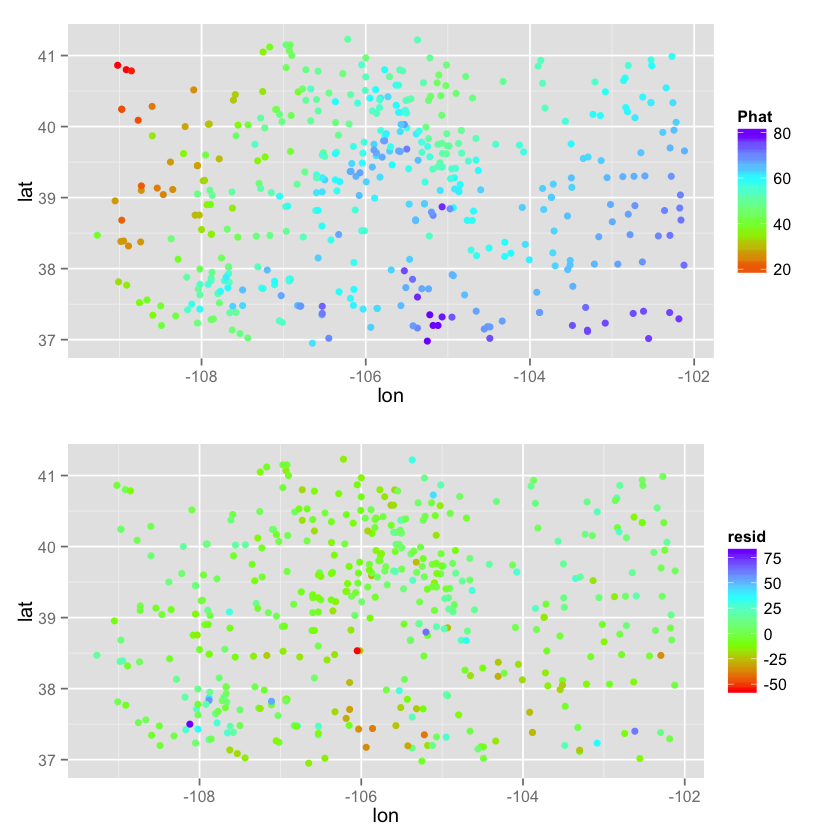

In [236]:
X = X[complete.cases(X),] # remove NAN values

X["Phat"] = mod$fitted.values
X["resid"] = mod$residuals

p1 = ggplot(X,aes(x=lon,y=lat,colour=Phat))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
p2 = ggplot(X,aes(x=lon,y=lat,colour=resid))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
multiplot(p1,p2, cols=1)

### vi - plot on dem grid w/ error

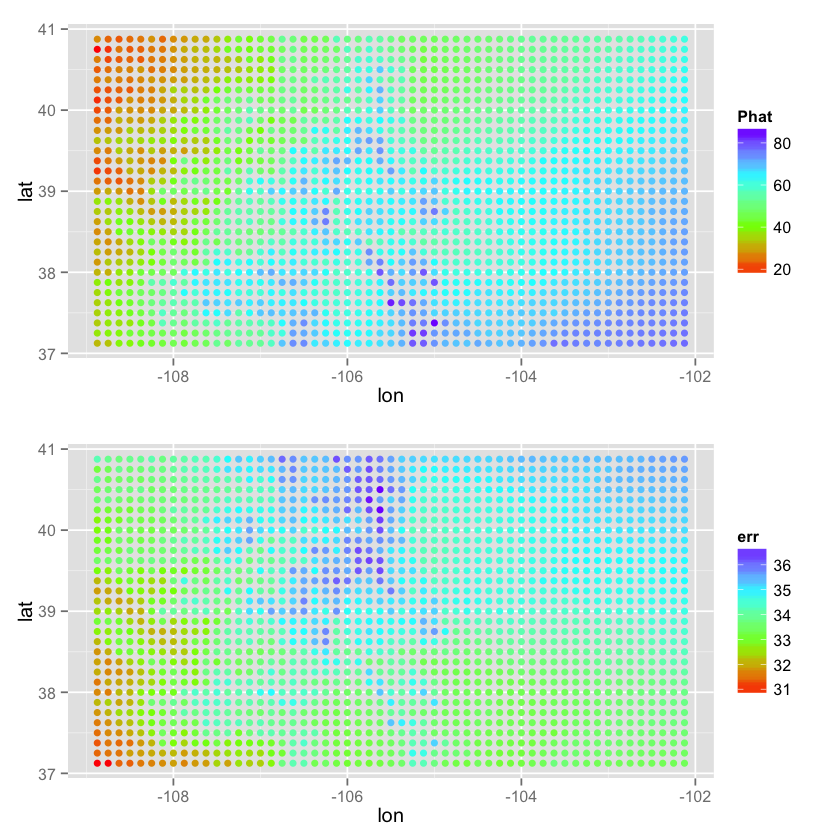

In [237]:
# predicted model and model error (needs actual error)
p1 = ggplot(pts,aes(x=lon,y=lat,colour=Phat))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
p2 = ggplot(pts,aes(x=lon,y=lat,colour=err))+geom_point()+scale_colour_gradientn(colours=rainbow(4))
multiplot(p1,p2, cols=1)